In [1]:
import numpy as np
import pandas as pd

import random
import time
import sys

import matplotlib.pyplot as plt
%matplotlib inline

from train import *

np.random.seed(42)
random.seed(42)

### Load and preprocess data. Derive new labels for target

In [2]:
data = load_data('r-m-t_data.lst')
data.head()

,size_,mass,type
0,51.2608,1390,C
1,26.3971,324,C
2,53.1652,1198,C
3,81.1242,3544,C
4,52.7037,1472,C


In [3]:
gr = data.groupby('type')

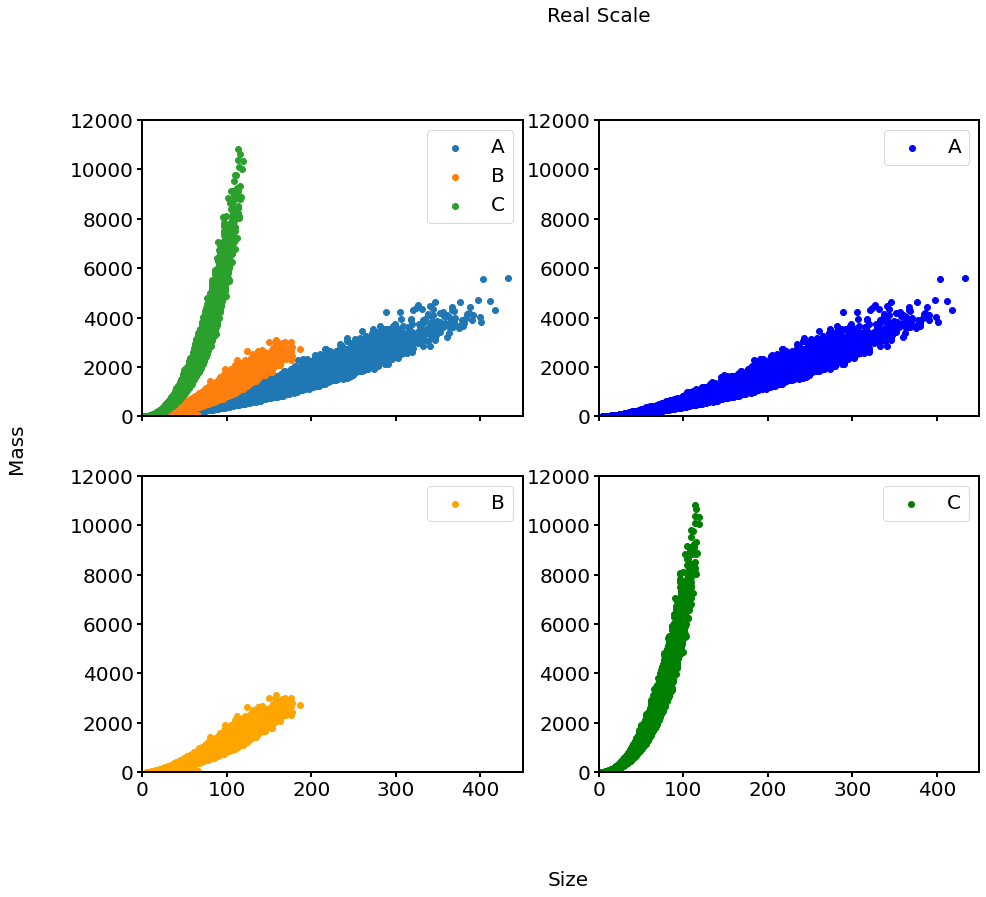

In [4]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 12))
axes = axes.ravel()

for n, g in gr:
    axes[0].scatter(g.size_, g.mass, label=n)
    axes[0].legend()
    axes[0].set_ylim(0, 12000)
    axes[0].set_xlim(0, 450)
    
    if n == 'A':
        axes[1].scatter(g.size_, g.mass, color='blue', label=n)
        axes[1].set_ylim(0, 12000)
        axes[1].set_xlim(0, 450)
        axes[1].legend()

    elif n == 'B':
        axes[2].scatter(g.size_, g.mass, color='orange', label=n)
        axes[2].set_ylim(0, 12000)
        axes[2].set_xlim(0, 450)
        axes[2].legend()

    elif n == 'C':
        axes[3].scatter(g.size_, g.mass, color='green', label=n)
        axes[3].set_ylim(0, 12000)
        axes[3].set_xlim(0, 450)
        axes[3].legend()

    else:
        raise ValueError('abc')
        

fig.text(0.5, 1, s='Real Scale', va='center', rotation='horizontal')
fig.text(0.5, 0, s='Size', va='center', rotation='horizontal')
fig.text(0, 0.5, s='Mass', va='center', rotation='vertical');

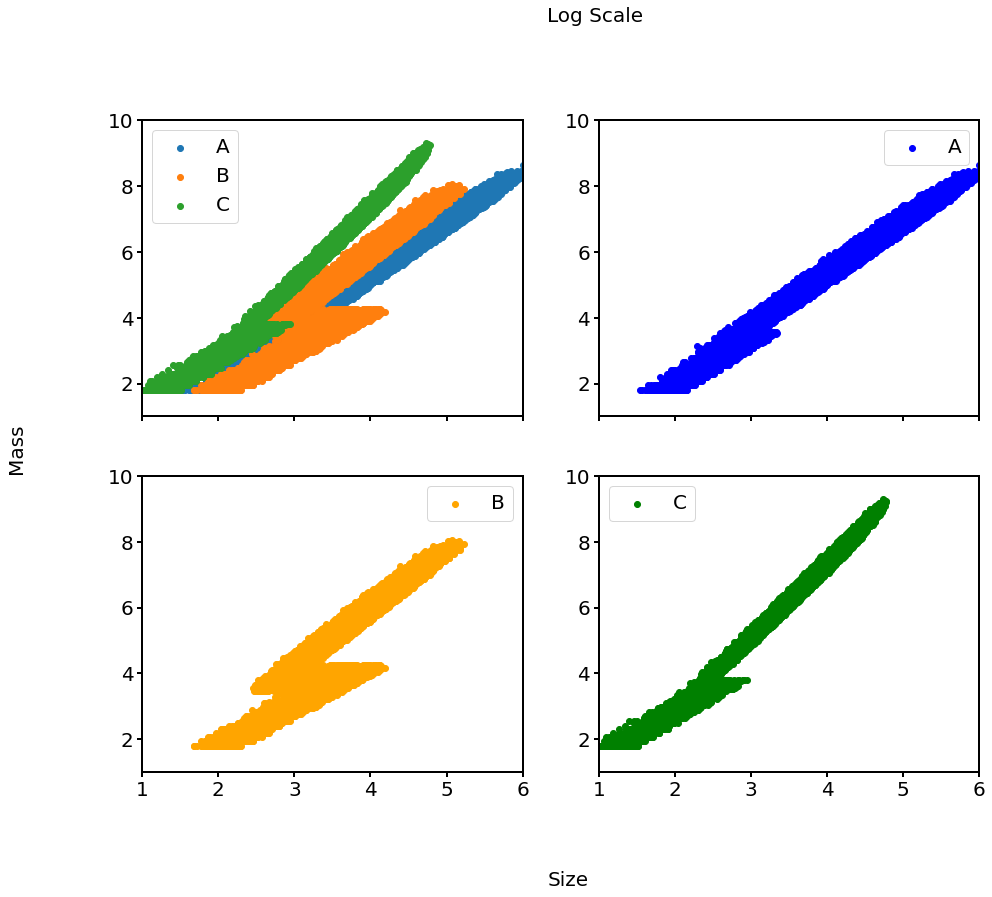

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 12))
axes = axes.ravel()

for n, g in gr:
    g.size_ = np.log(g.size_)
    g.mass = np.log(g.mass)
    axes[0].scatter(g.size_, g.mass, label=n)
    axes[0].legend()
    axes[0].set_ylim(1, 10)
    axes[0].set_xlim(1, 6)
    
    if n == 'A':
        axes[1].scatter(g.size_, g.mass, color='blue', label=n)
        axes[1].set_ylim(1, 10)
        axes[1].set_xlim(1, 6)
        axes[1].legend()

    elif n == 'B':
        axes[2].scatter(g.size_, g.mass, color='orange', label=n)
        axes[2].set_ylim(1, 10)
        axes[2].set_xlim(1, 6)
        axes[2].legend()

    elif n == 'C':
        axes[3].scatter(g.size_, g.mass, color='green', label=n)
        axes[3].set_ylim(1, 10)
        axes[3].set_xlim(1, 6)
        axes[3].legend()

    else:
        raise ValueError('abc')
        

fig.text(0.5, 1, s='Log Scale', va='center', rotation='horizontal')
fig.text(0.5, 0, s='Size', va='center', rotation='horizontal')
fig.text(0, 0.5, s='Mass', va='center', rotation='vertical');

**One can split existing targets with regard to aggregate formation**

In [6]:
log_scale_space = {'size_': {}, 'mass_': {}}

for n, g in gr:
    log_scale_space['size_'][n] = np.log(g.size_)
    log_scale_space['mass_'][n] = np.log(g.mass)

In [7]:
data['type'] = data.apply(lambda x: aggregate_form(x.type, np.log(x.size_), np.log(x.mass)), axis=1)

In [8]:
gr_upd = data.groupby('type')

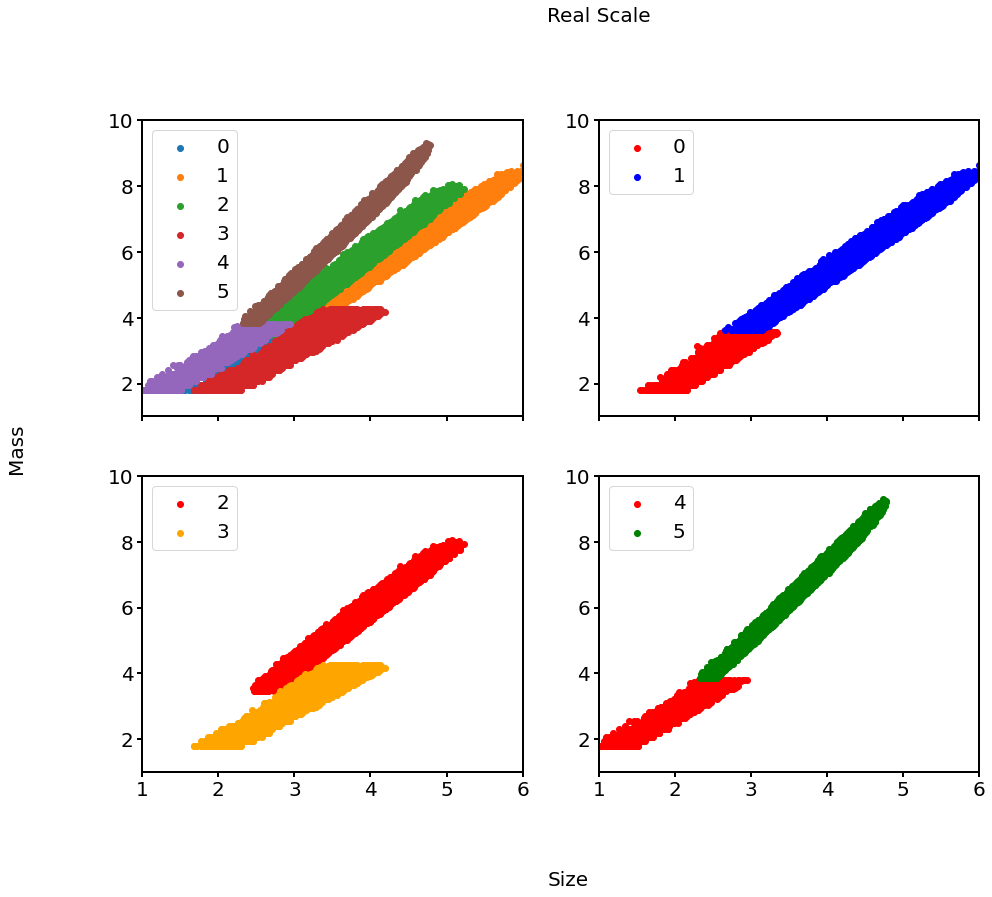

In [58]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 12))
axes = np.array(axes)
axes = axes.ravel()

for n, g in gr_upd:
    g.size_ = np.log(g.size_)
    g.mass = np.log(g.mass)
    axes[0].scatter(g.size_, g.mass, label=n)
    axes[0].legend()
    axes[0].set_ylim(1, 10)
    axes[0].set_xlim(1, 6)
    
    if (n == 0) or (n == 1):
        c = 'red' if n == 0 else 'blue'
        axes[1].scatter(g.size_, g.mass, color=c, label=n)
        axes[1].set_ylim(1, 10)
        axes[1].set_xlim(1, 6)
        axes[1].legend()

    elif (n == 2) or (n == 3):
        c = 'red' if n == 2 else 'orange'
        axes[2].scatter(g.size_, g.mass, color=c, label=n)
        axes[2].set_ylim(1, 10)
        axes[2].set_xlim(1, 6)
        axes[2].legend()

    elif (n == 4) or (n == 5):
        c = 'red' if n == 4 else 'green'
        axes[3].scatter(g.size_, g.mass, color=c, label=n)
        axes[3].set_ylim(1, 10)
        axes[3].set_xlim(1, 6)
        axes[3].legend()


fig.text(0.5, 1, s='Real Scale', va='center', rotation='horizontal')
fig.text(0.5, 0, s='Size', va='center', rotation='horizontal')
fig.text(0, 0.5, s='Mass', va='center', rotation='vertical');

### Theoretical Questions

In [59]:
from scipy.stats import linregress

In [62]:
d_A, _, _, _, _ = linregress(log_scale_space['size_']['A'], log_scale_space['mass_']['A'])
d_B, _, _, _, _ = linregress(log_scale_space['size_']['B'], log_scale_space['mass_']['B'])
d_C, _, _, _, _ = linregress(log_scale_space['size_']['C'], log_scale_space['mass_']['C'])
print(f'Fractal dimension for A: {d_A:.3f}, for B: {d_B:.3f}, for C: {d_C:.3f}')

Fractal dimension for A: 1.613, for B: 2.044, for C: 2.236


Smooth sphere has $d = 3$, melt has $d = 2$. *A* -- elongated chains; *B* -- close to Markovian coil; *C* -- slightly tends to smooth spherical surface.

`Why does system A show practically no ramified nucleus clusters?`. I believe, that it is because of very strong attraction between cores for this type of system. So, particles of type *A* aggregate formations way easier.

In [68]:
d_ls_6_types = []
for n, g in gr_upd:
    if (n == 0) | (n == 3) | (n == 4):
        continue
    size_d_ = np.log(g.size_)
    mass_d_ = np.log(g.mass)
    d_ls_6_types.append(linregress(size_d_, mass_d_)[0])
print(f'Fractal dimension (only for aggregated formations) for A: \
{d_ls_6_types[0]:.3f}, for B: {d_ls_6_types[1]:.3f}, for C: {d_ls_6_types[1]:.3f}')
print('(I am not sure that this dimensions after split into formated and not formated aggeregates is a proper way to do.')
print('Also note that split was made manually and may be not properly)')

Fractal dimension (only for aggregated formations) for A: 1.574, for B: 1.750, for C: 1.750
(I am not sure that this dimensions after split into formated and not formated aggeregates is a proper way to do.
Also note that split was made manually and may be not properly)


What's interesting that for aggregated formations fractal of type *B* and *C* has the same dimension.

### Check an Implementation

In [14]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, Birch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
print('Percent of each label in target:')
data['type'].value_counts() / data.shape[0] * 100

Percent of each label in target:


5    37.522409
1    31.977317
2    23.282381
3     3.637383
0     2.013213
4     1.567297
Name: type, dtype: float64

**Now we have ill-balanced problem**

In [16]:
data.head(1)

,size_,mass,type
0,51.2608,1390,5


In [17]:
X, y = data[['size_', 'mass']].to_numpy(), data['type'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
config_check = {
    'model_names': ['Random Forest', 'XGBoost', 'Tree_one-vs-all'],
    'models': [RandomForestClassifier, XGBClassifier, DecisionTreeClassifier],
    'params': [{'random_state': 42, 'n_jobs': -1},
               {'random_state': 42, 'n_jobs': -1},
               {'random_state': 42}],
    'hyper_params': [{'n_estimators': [50], 'max_depth': [3]},
                     {'n_estimators': [50], 'max_depth': [3]},
                     {'estimator__criterion':['gini'], 'estimator__max_depth': [2]}],
    'cv': 5,
    'verbose': True,
    'multiclass_str': [False, False, 'one-vs-rest']
}

results_check = main(config_check, 'classification', X_train, y_train, X_test, y_test)
results_check

0it [00:00, ?it/s]

  Model: Random Forest, f1_micro_score: 0.67793, best_params: {'max_depth': 3, 'n_estimators': 50}
  Model: XGBoost, f1_micro_score: 0.98283, best_params: {'max_depth': 3, 'n_estimators': 50}
  Model: Tree_one-vs-all, f1_micro_score: 0.65635, best_params: {'estimator__criterion': 'gini', 'estimator__max_depth': 2}


,f1_micro_train,f1_macro_train,f1_micro_test,f1_macro_test,acc_train,acc_test,exec_time,cv_grid_size
Random Forest,0.6865,0.4271,0.686,0.4257,0.6865,0.686,0:00:03,1
XGBoost,0.9845,0.9403,0.9841,0.9401,0.9845,0.9841,0:00:33,1
Tree_one-vs-all,0.6458,0.5143,0.6445,0.5131,0.6458,0.6445,0:00:02,1


In [ ]:
config_check_clust = {
    'model_names': ['KMeans', 'GaussianMixture'],
    'models': [KMeans, GaussianMixture],
    'params': [{'n_clusters': 6, 'random_state': 42},
               {'n_components': 6, 'random_state': 42}],
    'hyper_params': [{'algorithm': ['full'], 'max_iter': [300], 'tol': [1e-2]},
                     {'covariance_type': ['full'], 'reg_covar': [1e-6], 'tol': [1e-2], 'n_init': [1], 'init_params': ['kmeans']}],
    'cv': 5,
    'verbose': True,
    'multiclass_str': [False, False]
}

results_check_clust = main(config_check_clust, 'clustering', X_train, y_train, X_test, y_test)
results_check_clust

0it [00:00, ?it/s]

  Model: KMeans, silhouette_score: 0.57242, best_params: {'tol': 0.01, 'max_iter': 300, 'algorithm': 'full'}
  Model: GaussianMixture, silhouette_score: 0.28368, best_params: {'tol': 0.01, 'reg_covar': 1e-06, 'n_init': 1, 'init_params': 'kmeans', 'covariance_type': 'full'}


,silh_train,silh_test,mi_train,mi_test,acc_train,acc_test,exec_time,cv_grid_size
KMeans,0.5774,0.5797,0.1277,0.1287,0.2149,0.2182,0:07:14,1
GaussianMixture,0.2809,0.2788,0.3888,0.3863,0.0733,0.0732,0:07:08,1


**Clustering** is really computationally intensive and can't be parallelized. So, I will stick with the multi-classification (btw, in 2 dimensions clusters intercepts a lot, so it may be needed it increase a space of features).

### Run a Grid Search for Different Classification Algorithms

In [15]:
config_ = {
    'model_names': ['Random Forest', 'XGBoost', 'Tree_one-vs-all', 'LogReg_one-vs-all', 'KNN_one-vs-all'],
    'models': [RandomForestClassifier, XGBClassifier, DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier],
    'params': [{'random_state': 42, 'n_jobs': -1},
               {'objective': 'multi:softmax', 'random_state': 42, 'n_jobs': -1},
               {'random_state': 42},
               {'solver': 'liblinear', 'random_state': 42},
               {'n_jobs': -1}],
    'hyper_params': [{'n_estimators': np.arange(80, 140, 10), 'max_depth': np.arange(3, 10, 3)},
                     {'n_estimators': np.arange(80, 140, 10), 'max_depth': np.arange(3, 10, 3)},
                     {'estimator__criterion':['gini', 'entropy'], 'estimator__max_depth': np.arange(3, 21)},
                     {'estimator__penalty': ['l1', 'l2'], 'estimator__C': [1e-3, 1e-2, 1e-1, 1]},
                     {'estimator__n_neighbors': np.arange(3, 15), 'estimator__weights': ['uniform', 'distance'], 'estimator__p': [1, 2]}],
    'cv': 5,
    'verbose': True,
    'multiclass_str': [False, False, 'one-vs-rest', 'one-vs-rest', 'one-vs-rest']
}

results_ = main(config_, 'classification', X_train, y_train, X_test, y_test)
results_

0it [00:00, ?it/s]

  Model: Random Forest, f1_micro_score: 0.98155, best_params: {'max_depth': 9, 'n_estimators': 90}
  Model: XGBoost, f1_micro_score: 0.98436, best_params: {'max_depth': 6, 'n_estimators': 100}
  Model: Tree_one-vs-all, f1_micro_score: 0.98124, best_params: {'estimator__criterion': 'gini', 'estimator__max_depth': 11}
  Model: LogReg_one-vs-all, f1_micro_score: 0.88837, best_params: {'estimator__C': 1, 'estimator__penalty': 'l1'}
  Model: KNN_one-vs-all, f1_micro_score: 0.98390, best_params: {'estimator__n_neighbors': 13, 'estimator__p': 2, 'estimator__weights': 'uniform'}


,f1_micro_train,f1_macro_train,f1_micro_test,f1_macro_test,acc_train,acc_test,exec_time,cv_grid_size
Random Forest,0.9822,0.9356,0.9812,0.9337,0.9822,0.9812,0:09:46,18
XGBoost,0.9867,0.9466,0.9853,0.9424,0.9867,0.9853,0:30:54,18
Tree_one-vs-all,0.9883,0.9567,0.9824,0.9345,0.9883,0.9824,0:02:11,36
LogReg_one-vs-all,0.8884,0.5944,0.8885,0.593,0.8884,0.8885,0:01:01,8
KNN_one-vs-all,0.9858,0.9455,0.9848,0.9407,0.9858,0.9848,0:03:47,48


The most interesting values are **f1_micro_score and accuracy for the test subset**. These metrics are really high for all the models and the highest are for the xgboost (logistic regression is not considered as the worst model). However, it is not reasonable to use ensemble-models for such a task (e.g. computational time is high). Thus, a prediciton for the control dataset will be made with for the **Decision Tree model with ove-vs-rest strategy**.

**Labels: 0, 3, 4 correspond to not aggregated formations.**

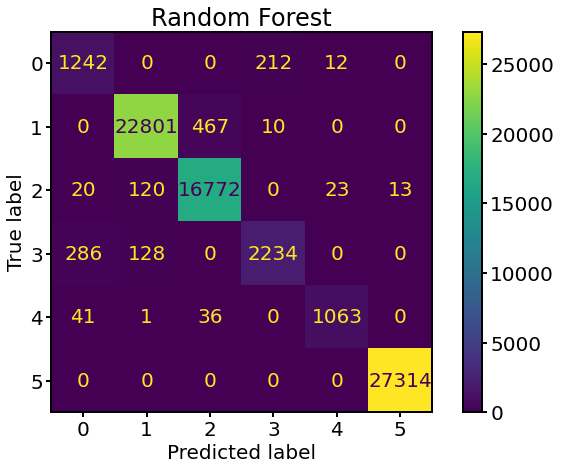

In [32]:
rfc = RandomForestClassifier(**config_['params'][0], max_depth=9, n_estimators=90)
rfc.fit(X_train, y_train)

conf_matr_rfc = ConfusionMatrixDisplay(confusion_matrix(y_test, rfc.predict(X_test)))
conf_matr_rfc.plot()
conf_matr_rfc.ax_.set_title('Random Forest');

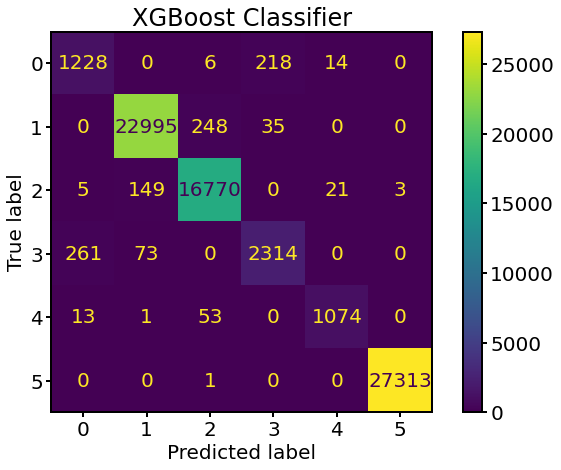

In [30]:
xgb = XGBClassifier(**config_['params'][1], max_depth=6, n_estimators=100)
xgb.fit(X_train, y_train)

conf_matr_xgb = ConfusionMatrixDisplay(confusion_matrix(y_test, xgb.predict(X_test)))
conf_matr_xgb.plot()
conf_matr_xgb.ax_.set_title('XGBoost Classifier');

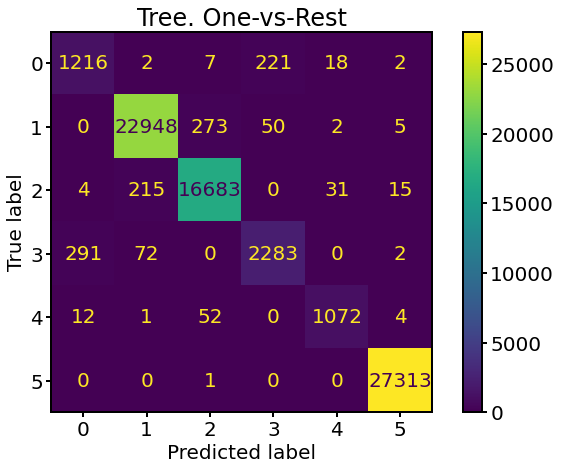

In [38]:
tree_vs_rest = OneVsRestClassifier(DecisionTreeClassifier(**config_['params'][2], criterion='gini', max_depth=11), n_jobs=-1)
tree_vs_rest.fit(X_train, y_train)

conf_matr_tree_vs_rest = ConfusionMatrixDisplay(confusion_matrix(y_test, tree_vs_rest.predict(X_test)))
conf_matr_tree_vs_rest.plot()
conf_matr_tree_vs_rest.ax_.set_title('Tree. One-vs-Rest');

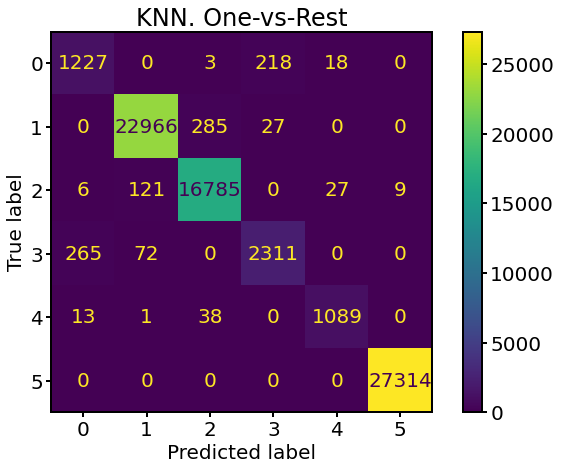

In [39]:
knn_vs_rest = OneVsRestClassifier(KNeighborsClassifier(**config_['params'][-1], n_neighbors=13, p=2, weights='uniform'), n_jobs=-1)
knn_vs_rest.fit(X_train, y_train)

conf_matr_knn_vs_rest = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_vs_rest.predict(X_test)))
conf_matr_knn_vs_rest.plot()
conf_matr_knn_vs_rest.ax_.set_title('KNN. One-vs-Rest');

### Log-scale features

In [37]:
config_log = {
    'model_names': ['Tree_one-vs-all', 'LogReg_one-vs-all', 'KNN_one-vs-all'],
    'models': [DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier],
    'params': [{'random_state': 42},
               {'solver': 'liblinear', 'random_state': 42, 'max_iter': 5000},
               {'n_jobs': -1}],
    'hyper_params': [{'estimator__criterion':['gini', 'entropy'], 'estimator__max_depth': np.arange(3, 21)},
                     {'estimator__penalty': ['l1', 'l2'], 'estimator__C': [1e-3, 1e-2, 1e-1, 1]},
                     {'estimator__n_neighbors': np.arange(3, 15), 'estimator__weights': ['uniform', 'distance'], 'estimator__p': [1, 2]}],
    'cv': 5,
    'verbose': True,
    'multiclass_str': ['one-vs-rest', 'one-vs-rest', 'one-vs-rest']
}

results_log = main(config_log, 'classification', np.log(X_train), y_train, np.log(X_test), y_test)
results_log

0it [00:00, ?it/s]

  Model: Tree_one-vs-all, f1_micro_score: 0.98121, best_params: {'estimator__criterion': 'entropy', 'estimator__max_depth': 12}
  Model: LogReg_one-vs-all, f1_micro_score: 0.88940, best_params: {'estimator__C': 1, 'estimator__penalty': 'l1'}
  Model: KNN_one-vs-all, f1_micro_score: 0.98430, best_params: {'estimator__n_neighbors': 13, 'estimator__p': 1, 'estimator__weights': 'uniform'}


,f1_micro_train,f1_macro_train,f1_micro_test,f1_macro_test,acc_train,acc_test,exec_time,cv_grid_size
Tree_one-vs-all,0.9882,0.9562,0.9823,0.9335,0.9882,0.9823,0:00:15,36
LogReg_one-vs-all,0.8894,0.7543,0.8888,0.7578,0.8894,0.8888,0:01:36,8
KNN_one-vs-all,0.9861,0.9454,0.9849,0.9408,0.9861,0.9849,0:01:02,48


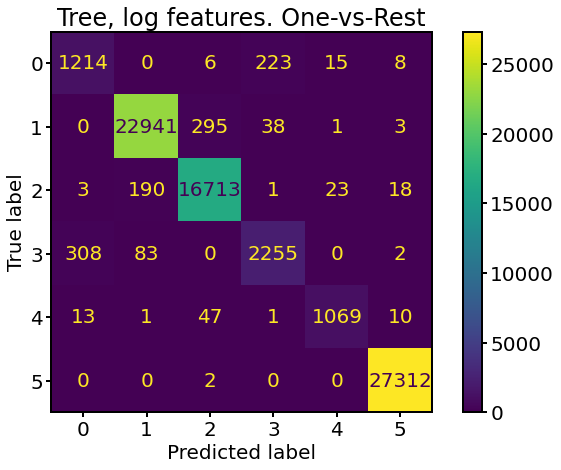

In [42]:
tree_vs_rest_log = OneVsRestClassifier(DecisionTreeClassifier(**config_log['params'][0], criterion='entropy', max_depth=12), n_jobs=-1)
tree_vs_rest_log.fit(np.log(X_train), y_train)

conf_matr_tree_vs_rest_log = ConfusionMatrixDisplay(confusion_matrix(y_test, tree_vs_rest_log.predict(np.log(X_test))))
conf_matr_tree_vs_rest_log.plot()
conf_matr_tree_vs_rest_log.ax_.set_title('Tree, log features. One-vs-Rest');

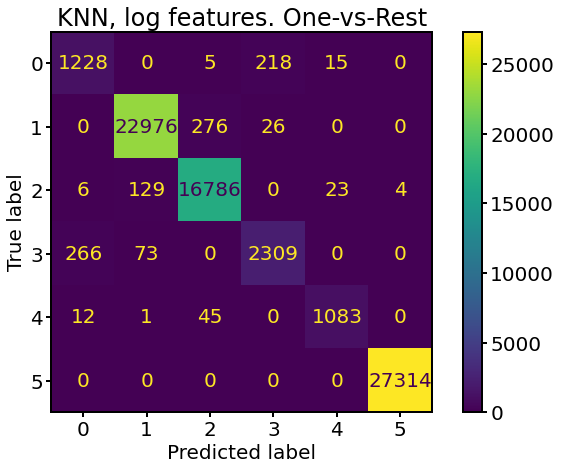

In [44]:
knn_vs_rest_log = OneVsRestClassifier(KNeighborsClassifier(**config_log['params'][2], n_neighbors=13, p=1, weights='uniform'), n_jobs=-1)
knn_vs_rest_log.fit(np.log(X_train), y_train)

conf_matr_knn_vs_rest_log = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_vs_rest_log.predict(np.log(X_test))))
conf_matr_knn_vs_rest_log.plot()
conf_matr_knn_vs_rest_log.ax_.set_title('KNN, log features. One-vs-Rest');

**Labels: 0, 3, 4 correspond to not aggregated formations.** Basically, there is no huge gain with usage of log features. May be both regular and log features should be used combined. For clustering I believe that, log feautres shoud be used. But it still will be not really good predicitons because of overlaping of clusters in just 2 dimensions.

### Control Dataset

In [48]:
data_ctrl = load_data('r-m-t_control.lst', hidden_test=True)
print(data_ctrl.shape)
data_ctrl.head(2)

(897, 2)


,size_,mass
0,51.2658,1390
1,28.7796,324


In [49]:
tree_vs_rest_ctrl = OneVsRestClassifier(DecisionTreeClassifier(criterion='gini', max_depth=11, random_state=42), n_jobs=-1)
tree_vs_rest_ctrl.fit(X, y)

OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=11,
                                                     random_state=42),
                    n_jobs=-1)

In [55]:
y_hat_hidd_test = tree_vs_rest_ctrl.predict(data_ctrl)
y_hat_hidd_test = pd.DataFrame(y_hat_hidd_test, columns=['types_6'])

In [56]:
y_hat_hidd_test['type_ABC'] = y_hat_hidd_test.apply(lambda x: 'A' if (x.types_6 == 0) | (x.types_6 == 1) else 'B' if (x.types_6 == 2) | (x.types_6 == 3) else 'C', axis=1)
y_hat_hidd_test.head()

,types_6,type_ABC
0,5,C
1,5,C
2,5,C
3,5,C
4,5,C


In [69]:
y_hat_hidd_test.to_csv('control_prediction_trifonov.csv')